# Mortgage Prediction

## Data Loading

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train= pd.read_csv("capstone.csv")
test= pd.read_csv("test.csv.csv")

In [3]:
train.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
0,0,3,1,1,1,70,3,18,37,246,...,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False
1,1,1,1,3,1,178,3,369,52,299,...,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False
2,2,2,1,3,1,163,3,16,10,306,...,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False
3,3,1,1,1,1,155,1,305,47,180,...,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True
4,4,1,1,1,1,305,3,24,37,20,...,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False


In [4]:
test.head()

,row_id,accepted
0,0,1
1,1,0
2,2,1
3,3,1
4,4,1


## Data Overview

In [5]:
train.shape

(500000, 22)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 22 columns):
row_id                            500000 non-null int64
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null int64
preapproval                       500000 non-null int64
msa_md                            500000 non-null int64
state_code                        500000 non-null int64
county_code                       500000 non-null int64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  460052 non-null float64
population                        477535 non-null float64
minority_population_pct           477534 non-

In [7]:
train.describe()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,...,500000.000000,500000.000000,460052.000000,477535.000000,477534.000000,477560.000000,477486.000000,477435.000000,477470.000000,500000.000000
mean,249999.500000,1.366276,1.047650,2.066810,1.109590,221.753158,2.764722,181.606972,23.726924,144.542062,...,4.786586,1.462374,102.389521,5416.833956,31.617310,69235.603298,91.832624,1427.718282,1886.147065,3720.121344
std,144337.711635,0.690555,0.231404,0.948371,0.326092,590.641648,0.543061,138.464169,15.982768,100.243612,...,1.024927,0.677685,153.534496,2728.144999,26.333938,14810.058791,14.210924,737.559511,914.123744,1838.313175
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,1.000000,14.000000,0.534000,17858.000000,3.981000,4.000000,1.000000,0.000000
25%,124999.750000,1.000000,1.000000,1.000000,1.000000,93.000000,3.000000,25.000000,6.000000,57.000000,...,5.000000,1.000000,47.000000,3744.000000,10.700000,59731.000000,88.067250,944.000000,1301.000000,2442.000000
50%,249999.500000,1.000000,1.000000,2.000000,1.000000,162.000000,3.000000,192.000000,26.000000,131.000000,...,5.000000,1.000000,74.000000,4975.000000,22.901000,67526.000000,100.000000,1327.000000,1753.000000,3731.000000
75%,374999.250000,2.000000,1.000000,3.000000,1.000000,266.000000,3.000000,314.000000,37.000000,246.000000,...,5.000000,2.000000,117.000000,6467.000000,46.020000,75351.000000,100.000000,1780.000000,2309.000000,5436.000000
max,499999.000000,4.000000,3.000000,3.000000,3.000000,100878.000000,3.000000,408.000000,52.000000,324.000000,...,7.000000,4.000000,10139.000000,37097.000000,100.000000,125248.000000,100.000000,8771.000000,13623.000000,6508.000000


In [8]:
train.columns.tolist()

['row_id',
 'loan_type',
 'property_type',
 'loan_purpose',
 'occupancy',
 'loan_amount',
 'preapproval',
 'msa_md',
 'state_code',
 'county_code',
 'applicant_ethnicity',
 'applicant_race',
 'applicant_sex',
 'applicant_income',
 'population',
 'minority_population_pct',
 'ffiecmedian_family_income',
 'tract_to_msa_md_income_pct',
 'number_of_owner-occupied_units',
 'number_of_1_to_4_family_units',
 'lender',
 'co_applicant']

In [9]:
train.occupancy.unique()

array([1, 2, 3], dtype=int64)

## Data Cleaning

In [10]:
train.isnull().sum()

row_id                                0
loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                                0
state_code                            0
county_code                           0
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  39948
population                        22465
minority_population_pct           22466
ffiecmedian_family_income         22440
tract_to_msa_md_income_pct        22514
number_of_owner-occupied_units    22565
number_of_1_to_4_family_units     22530
lender                                0
co_applicant                          0
dtype: int64

In [11]:
test.isnull().sum()

row_id      0
accepted    0
dtype: int64

In [12]:
data_clean = train[train.msa_md !=-1]
data_clean.columns.tolist()

['row_id',
 'loan_type',
 'property_type',
 'loan_purpose',
 'occupancy',
 'loan_amount',
 'preapproval',
 'msa_md',
 'state_code',
 'county_code',
 'applicant_ethnicity',
 'applicant_race',
 'applicant_sex',
 'applicant_income',
 'population',
 'minority_population_pct',
 'ffiecmedian_family_income',
 'tract_to_msa_md_income_pct',
 'number_of_owner-occupied_units',
 'number_of_1_to_4_family_units',
 'lender',
 'co_applicant']

In [13]:
data_clean=train.drop(['number_of_1_to_4_family_units','ffiecmedian_family_income','tract_to_msa_md_income_pct','number_of_owner-occupied_units','minority_population_pct'], axis=1)

In [14]:
data_clean["applicant_income"].fillna( method ='ffill', inplace = True)
data_clean["population"].fillna( method ='ffill', inplace = True)

In [15]:
data_clean.isnull().sum()

row_id                 0
loan_type              0
property_type          0
loan_purpose           0
occupancy              0
loan_amount            0
preapproval            0
msa_md                 0
state_code             0
county_code            0
applicant_ethnicity    0
applicant_race         0
applicant_sex          0
applicant_income       0
population             0
lender                 0
co_applicant           0
dtype: int64

In [16]:
data_clean.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,lender,co_applicant
0,0,3,1,1,1,70,3,18,37,246,2,5,1,24.0,6203.0,4536,False
1,1,1,1,3,1,178,3,369,52,299,1,5,1,57.0,5774.0,2458,False
2,2,2,1,3,1,163,3,16,10,306,2,5,1,67.0,6094.0,5710,False
3,3,1,1,1,1,155,1,305,47,180,2,5,1,105.0,6667.0,5888,True
4,4,1,1,1,1,305,3,24,37,20,2,3,2,71.0,6732.0,289,False


In [17]:
data_clean.to_csv("C:\\Users\Jasleen\Documents\Semester 4\Capstone Project 402\Project Files\data_clean.csv")

## Visualization

In [18]:
##  correlation
#correlation = data_clean.corr()
#  tick labels
#matrix_cols = correlation.columns.tolist()
#f = plt.figure(figsize=(19, 15))
#plt.matshow(correlation.corr(), fignum=f.number)
#plt.xticks(range(correlation.shape[1]), correlation.columns, fontsize=14, rotation=45)
#plt.yticks(range(correlation.shape[1]), correlation.columns, fontsize=14)
#cb = plt.colorbar()
#cb.ax.tick_params(labelsize=14)
#correlation.style.background_gradient(cmap='coolwarm')

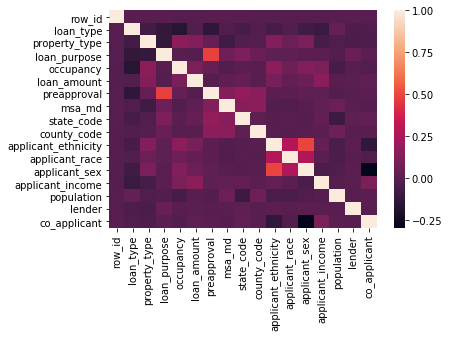

In [19]:
corr = data_clean.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [20]:
corr_array  = np.array(corr)

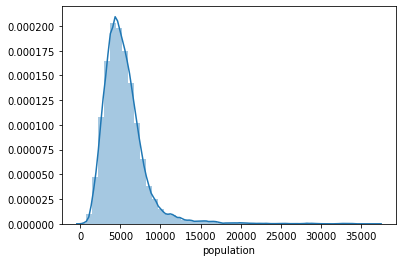

In [21]:
sns.distplot(data_clean['population'])

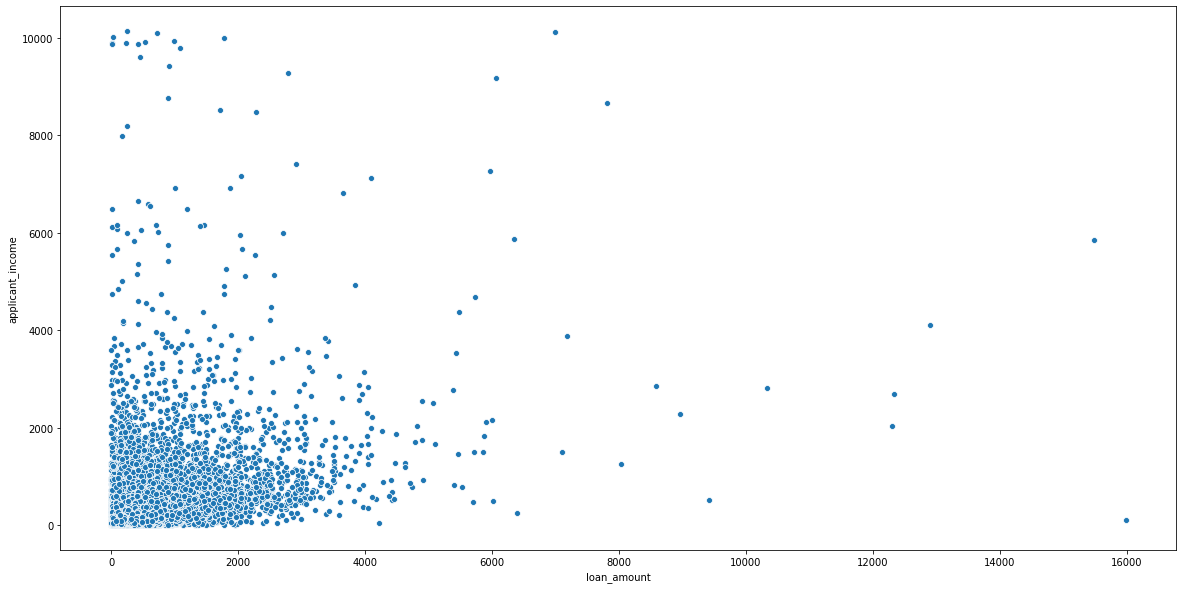

In [22]:
plt.figure(figsize = (20, 10))
sns.scatterplot(data_clean['loan_amount'], train['applicant_income'])  ##, hue=data['Loan_Status'])##

## Model Building

In [23]:
#from sklearn.feature_selection import SelectFromModel
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LogisticRegression

#select_rf = SelectFromModel(
    #RandomForestClassifier(n_estimators=100, random_state=0),
    #threshold="median")

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test= train_test_split(data_clean, random_state = 41)

In [25]:
X_train.shape

(375000, 17)

In [26]:
X_test.shape

(125000, 17)

In [27]:
Y_train, Y_test= train_test_split(data_clean, random_state = 41)

In [28]:
Y_train.shape

(375000, 17)

In [29]:
Y_test.shape

(125000, 17)

In [30]:
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=20)
tree.fit(X_train, Y_train)

In [ ]:
tree.score(X_test, Y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, Y_train)